In [11]:
from typing import TypedDict, List, Annotated
from langgraph.graph import END, StateGraph
import operator

Basic State

In [12]:
class SimpleState(TypedDict):
    count: int


def increment(state: SimpleState) -> SimpleState: 
    return {
        "count": state["count"] + 1
    }

Complex State

In [13]:
class ComplexState(TypedDict):
    count: int
    sum: Annotated[int, operator.add]
    history: Annotated[List[int], operator.concat]


def increment(state: ComplexState) -> ComplexState: 

    new_count = state["count"] + 1

    return {
        "count": new_count, 
        "sum": new_count, 
        "history": [new_count]
    }

In [14]:
def should_continue(state):
    if(state["count"] < 5): 
        return "continue"
    else: 
        return "stop"

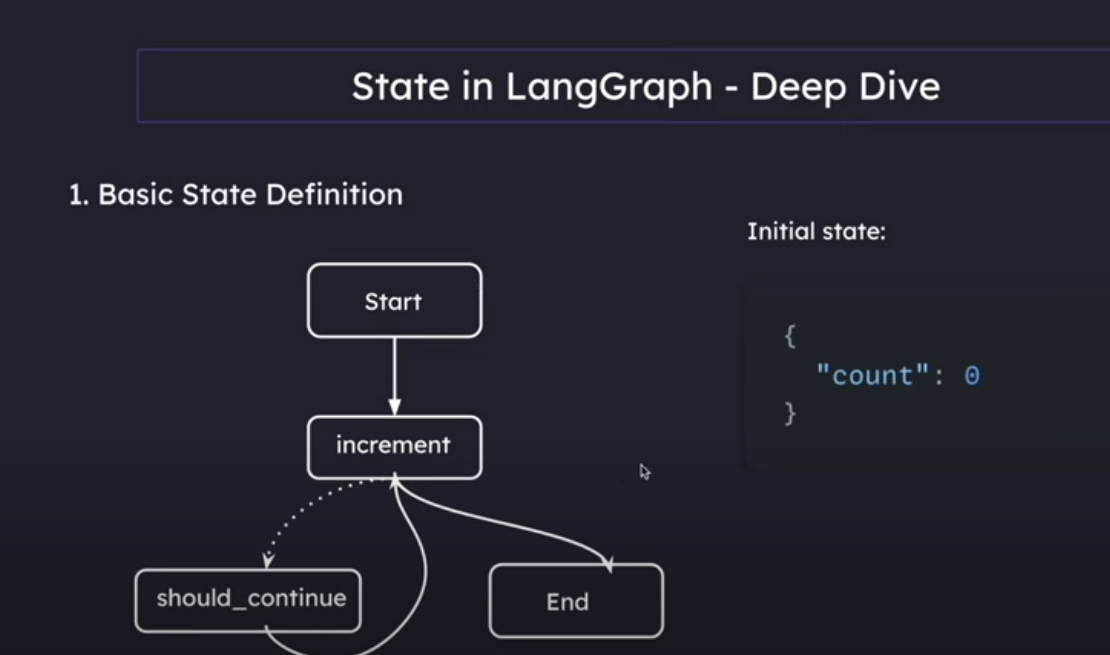

In [15]:
# graph = StateGraph(SimpleState)

graph = StateGraph(ComplexState)


graph.add_node("increment", increment)

graph.set_entry_point("increment")

graph.add_conditional_edges(
    "increment", 
    should_continue, 
    {
        "continue": "increment", 
        "stop": END
    }
)

app = graph.compile()

In [16]:
simple_state = {
    "count": 0
}

complex_state = {
    "count": 0, 
    "sum": 0, 
    "history": []
}

result = app.invoke(complex_state)

print(result)

{'count': 5, 'sum': 15, 'history': [1, 2, 3, 4, 5]}
